### Introduction

In recent years, the eSports industry has grown by leaps and bounds, especially during the COVID-19 Pandemic. In 2015, the eSports industry amassed over 115 million viewers (Parsahkov et al., 2018). This industry shows no slowing, being projected to hit over 640 million viewers by 2025 (Kashcha et al., 2022). Being the fourth most installed app in the app store, Clash of Clans is a popular game that has remained relevant for over a decade. As such, we decided to focus on this game in particular. We aim to discover which countries perform the best, and any potential reasons for this difference in performance. We wish to start off by analyzing Canadian performance against American performance.

To do this, we analyzed mean clan war win proportion and its standard deviation for Canadian and American clans. A clan is a group of up to 50 members who come from a single country. These clans can compete with each other in a "war", in which members of each clan are pitted against each other. We used a publicly available dataset from Kaggle (https://www.kaggle.com/datasets/asaniczka/clash-of-clans-clans-dataset-2023-3-5m-clans). Through statistical analysis, we will answer the question "How does the clan war win proportion and its standard deviation in Clash of Clans differ between players located in the United states and Canada?"

In [1]:
library(tidyverse)
library(infer)
library(cowplot)
library(datateachr)
library(digest)
library(repr)
library(taxyvr)
library(gridExtra)
library(broom)
set.seed(1)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [2]:
dataset <- read_csv("https://raw.githubusercontent.com/StevenHuang73/STAT-201-Final-Project/main/dataset.csv")

New names:
• `` -> `...1`
Rows: 189677 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): clan_location, clan_tag, clan_type
dbl (5): ...1, war_wins, war_losses, war_ties, clan_level

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
head(dataset)

...1,clan_location,war_wins,war_losses,war_ties,clan_tag,clan_type,clan_level
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
20,Canada,5,0,0,#2QJUQ2VCY,inviteOnly,2
22,Mexico,0,0,0,#22VL22VPV,open,1
52,United States,16,10,0,#2YPR0L9L8,open,5
68,Canada,1,7,0,#2QC82G2J0,open,1
74,United States,0,0,0,#Y8YQ280U,open,1
90,United States,116,117,0,#2CY0G9GP,inviteOnly,11


## Preliminary Results

#### Cleaning the data

In [3]:
dataset_clean <- dataset %>%
    rename(ID = ...1) %>%
    filter(clan_location != "Mexico") %>%
    mutate(total_wars = war_losses + war_wins + war_ties) %>%
    filter(total_wars > 100) %>%                                # remove inactive clans
    mutate(win_proportion = war_wins/total_wars) %>%
    mutate_if(is.numeric, ~ round(., 4))
head(dataset_clean)
nrow(dataset_clean)

ID,clan_location,war_wins,war_losses,war_ties,clan_tag,clan_type,clan_level,total_wars,win_proportion
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
90,United States,116,117,0,#2CY0G9GP,inviteOnly,11,233,0.4979
280,United States,186,437,0,#2J0QCL8V,open,15,623,0.2986
368,United States,613,0,0,#80Y8C9YC,inviteOnly,25,613,1.0000
403,United States,509,0,0,#PCUCG9PR,inviteOnly,24,509,1.0000
973,United States,302,0,0,#2YGR98LCC,inviteOnly,20,302,1.0000
1009,United States,336,307,7,#P2P298CG,inviteOnly,16,650,0.5169


[1] 18966

#### Descriptives

In [4]:
cat("Number of rows in this dataset is")
nrow(dataset_clean)

Number of rows in this dataset is

[1] 18966

In [5]:
descriptive_table <- dataset_clean %>%
    group_by(clan_location) %>%
    summarize(number_of_clans = n(),
              average_total_wars = mean(total_wars),
              sd_total_wars = sd(total_wars),
              average_win_proportion = mean(win_proportion),
              sd_win_proprortion = sd(win_proportion)
              )

descriptive_table

clan_location,number_of_clans,average_total_wars,sd_total_wars,average_win_proportion,sd_win_proprortion
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Canada,1860,308.5833,237.3063,0.6393232,0.2699225
United States,17106,298.3266,226.6395,0.6284181,0.2712906


In [8]:
observed_clan_number_diff <- descriptive_table[1, 2] - descriptive_table[2, 2] 
cat("Observed difference in number of clans (Canada - USA) is")
pull(observed_clan_number_diff)

Observed difference in number of clans (Canada - USA) is

[1] -15246

In [9]:
observed_war_number_diff <- descriptive_table[1, 3] - descriptive_table[2, 3] 

cat("Observed difference in average number of wars (Canada - USA) is")
pull(observed_war_number_diff)

Observed difference in average number of wars (Canada - USA) is

[1] 10.25672

In [10]:
observed_prop_diff <- descriptive_table[1, 5] - descriptive_table[2, 5] 

cat("Observed difference in mean Win Proportion (Canada - USA) is")
pull(observed_prop_diff)

Observed difference in mean Win Proportion (Canada - USA) is

[1] 0.01090508

#### Sample Distributions

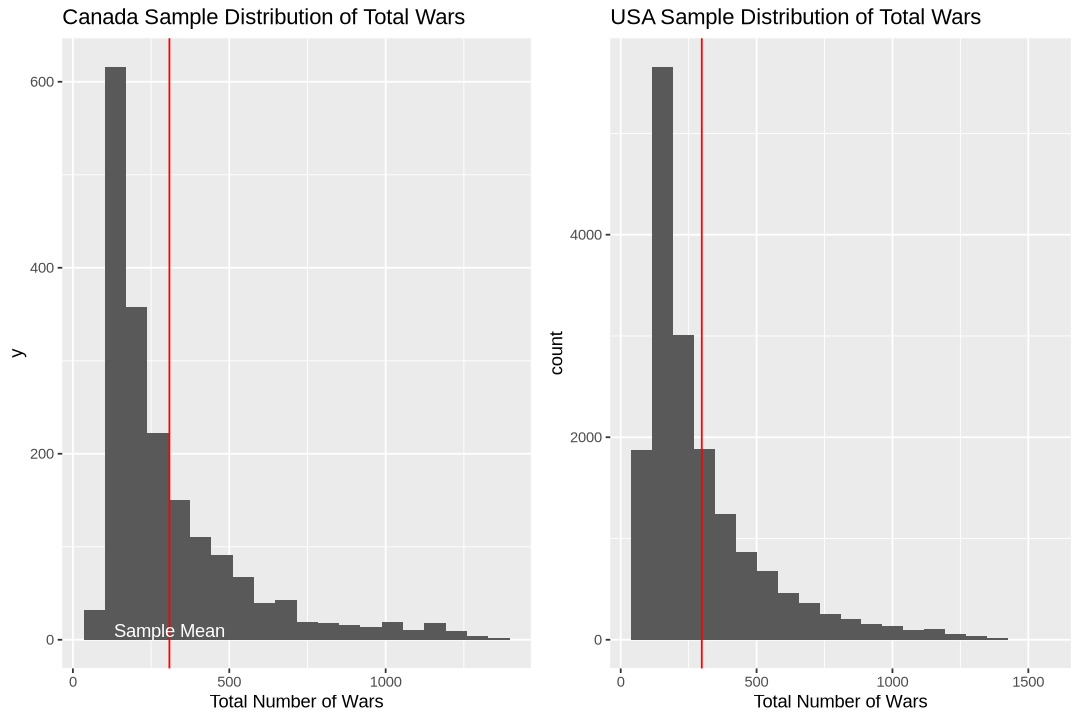

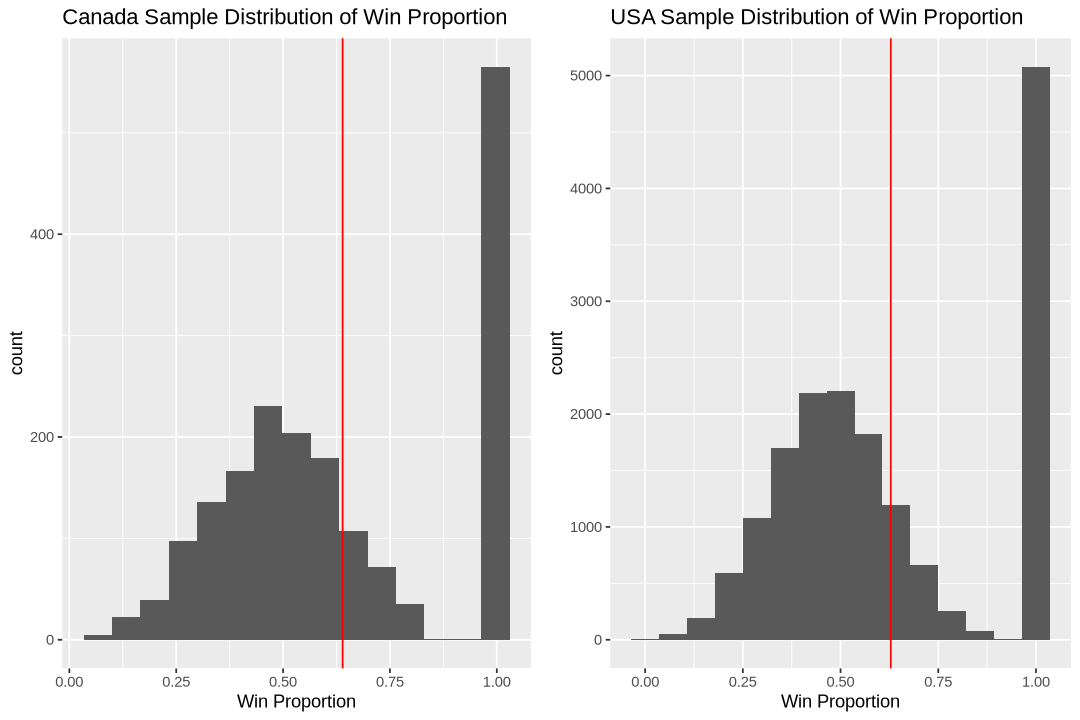

In [11]:
options(repr.plot.width = 9, repr.plot.height = 6)

# create sample distributions of total wars for Canada 
sample_dist_total_wars_can <- dataset_clean %>%
    select(total_wars, clan_location) %>%
    filter(clan_location == "Canada") %>%
    ggplot(aes(x = total_wars)) +
    geom_histogram(bins = 20) +
    labs(x = "Total Number of Wars", title = "Canada Sample Distribution of Total Wars") +
    geom_vline(xintercept = as.numeric(descriptive_table[1, 3]), color = "red") +                                    # vertical red line for sample mean
    annotate("text", x = as.numeric(descriptive_table[1, 3]) + 0.02, y = 10, label = "Sample Mean", color = "white") # label the vertical line 

# create sample distributions of total wars for United States 
sample_dist_total_wars_usa <- dataset_clean %>%
    select(total_wars, clan_location) %>%
    filter(clan_location == "United States") %>%
    ggplot(aes(x = total_wars)) +
    geom_histogram(bins = 20) +
    labs(x = "Total Number of Wars", title = "USA Sample Distribution of Total Wars") +
    geom_vline(xintercept = as.numeric(descriptive_table[2, 3]), color = "red")

# arrange the sample distributions next to each other
grid.arrange(sample_dist_total_wars_can, sample_dist_total_wars_usa, ncol = 2)



# create sample distributions of win proportion for Canada 
sample_dist_props_can <- dataset_clean %>%
    select(win_proportion, clan_location) %>%
    filter(clan_location == "Canada") %>%
    ggplot(aes(x = win_proportion)) +
    geom_histogram(bins = 15) +
    labs(x = "Win Proportion", title = "Canada Sample Distribution of Win Proportion") +
    geom_vline(xintercept = as.numeric(descriptive_table[1, 5]), color = "red")

# create sample distributions of win proportion for United States 
sample_dist_props_usa <- dataset_clean %>%
    select(win_proportion, clan_location) %>%
    filter(clan_location == "United States") %>%
    ggplot(aes(x = win_proportion)) +
    geom_histogram(bins = 15) +
    labs(x = "Win Proportion", title = "USA Sample Distribution of Win Proportion") +
    geom_vline(xintercept = as.numeric(descriptive_table[2, 5]), color = "red")

# arrange the sample distributions next to each other
grid.arrange(sample_dist_props_can, sample_dist_props_usa, ncol = 2)

### Methods

The report is an analysis of a sample of clans from both the United States and Canada. Multiple statistical inferential methods will be used in the final outcome of this report, such as calculating multiple confidence intervals of different sizes. 
In addition, a hypothesis testing portion, including a null distribution and p value calculation will be included. We aim to test the
hypothesis: 
* $H_0: u_c = u_u$ vs $H_1: u_c \neq u_u$
<a/>

Where $u_c = $ mean Canadian clan war win proportion, and $u_u =$ mean American clan war win proportion. This will maximise the trustworthiness and  effectiveness of our final report. The plots and graphs displayed only show preliminary data about the dataset in question, and do not offer any solid results to be concluded. Statistics such as the sample mean, sample distribution, and the standard deviation of the sample are not enough to put together a conclusive report. Thus, we must use the methods that we’ve described above to close this gap, to ensure stakeholder confidence.



We expect to find no real significant difference between the mean win proportion of Canadian clans vs American clans. Being in such close proximity with each other in terms of location and culture, the quality of players should also remain relatively the same. However in the case that this is not the reality, it will beg the question of what is causing this difference in player quality, despite the previous similarities mentioned? How might the potential gap be closed between the two countries? If there is a reason discovered causing the difference in player quality, can it be applied to the performance of other countries in the eSports industry as well? Furthermore if a difference is discovered, it could impact the funding and sponsorship of different teams from the two countries. As a stakeholder, they would obviously want to invest in the better performing country.


## Results

To begin, we first wrangle the data into just the columns that we will be working with.

In [6]:
working_dataset <- dataset_clean |>
    select(c(clan_location, win_proportion)) 

head(working_dataset)

clan_location,win_proportion
<chr>,<dbl>
United States,0.4979
United States,0.2986
United States,1.0000
United States,1.0000
United States,1.0000
United States,0.5169


Next, we calculated the observed mean difference in average win proportion between the two countries within the sample.

In [7]:
obs_mean_diff <- working_dataset %>% 
    group_by(clan_location) %>% 
    summarise(mean = mean(win_proportion)) %>%
    pivot_wider(names_from = clan_location, values_from = mean) %>%
    transmute(diff = `United States` - Canada) %>%
    pull(diff)

obs_mean_diff

[1] -0.01090508

#### Getting the 95% confidence interval using bootstrapping
We start by creating the bootstrap samples using the infer package


In [8]:

bootstrap_dist <- working_dataset %>%
    specify(formula = win_proportion ~ clan_location) %>%
    generate(reps = 250, type = "bootstrap") %>%
    calculate(stat = "diff in means", order = c("United States", "Canada"))

head(bootstrap_dist)

replicate,stat
<int>,<dbl>
1,-0.016512195
2,0.005662824
3,-0.003342645
4,-0.026829912
5,-0.015748616
6,0.005604662


#### Our obtained 95% confidence interval

In [9]:
bootstrap_CI <- bootstrap_dist %>%
    get_ci(level = 0.95, type = "percentile")

bootstrap_CI

lower_ci,upper_ci
<dbl>,<dbl>
-0.02593439,0.003009559


This means that we are 95% confident that the difference in mean win proportion between clans in the USA and Canada is between 0.02593439 and 0.003009559. Since this interval includes the null hypothesis value of 0, this bootstrapping method failed to reject the null hypothesis.

#### Visualization of the bootstrap distribution and confidence interval

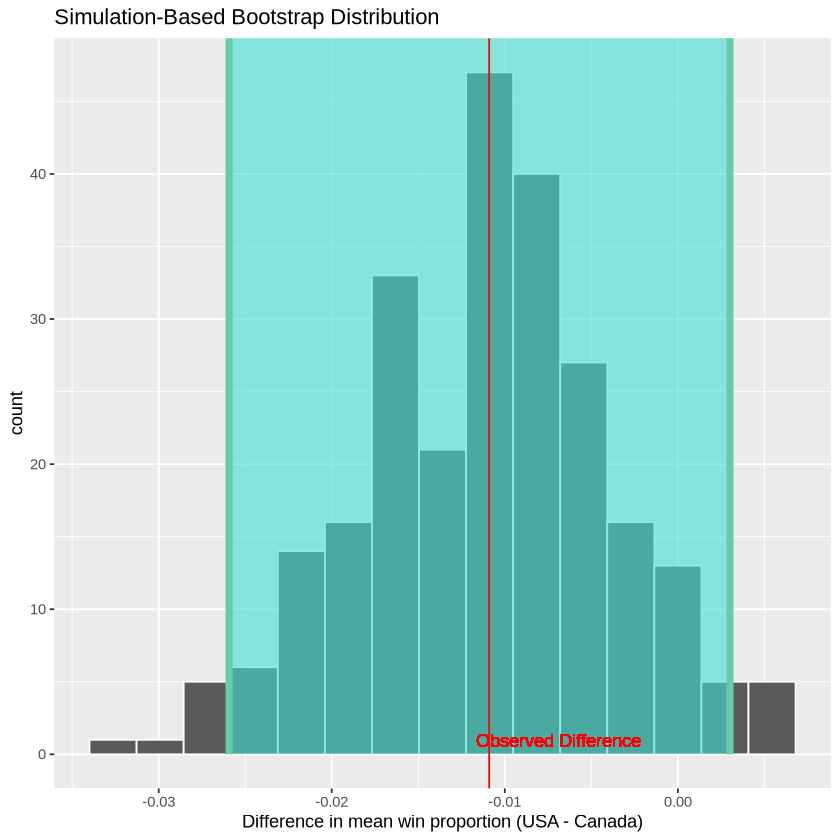

In [10]:
viz_bootstrap_CI <- bootstrap_dist %>%
    visualize() +
    shade_ci(endpoints = bootstrap_CI) +
    xlab("Difference in mean win proportion (USA - Canada)")+
    geom_vline(xintercept = obs_mean_diff, color = "red") +
    geom_text(aes(x = obs_mean_diff + 0.004, y = 0.5, label = "Observed Difference"), color = "red", vjust = 0)  

viz_bootstrap_CI

#### Finally, we are able to obtain the null model for our experiment.

In [11]:

null_model <- working_dataset %>% 
    specify(formula = win_proportion ~ clan_location) |>
    hypothesize(null = "independence") |>
    generate(reps = 250, type = "permute") |>
    calculate(stat="diff in means", order = c("United States", "Canada"))
    

head(null_model)

replicate,stat
<int>,<dbl>
1,0.007103678
2,-0.011217134
3,-0.010141722
4,0.007057004
5,0.009175163
6,-0.007599801


We can visualize the null model as so:

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


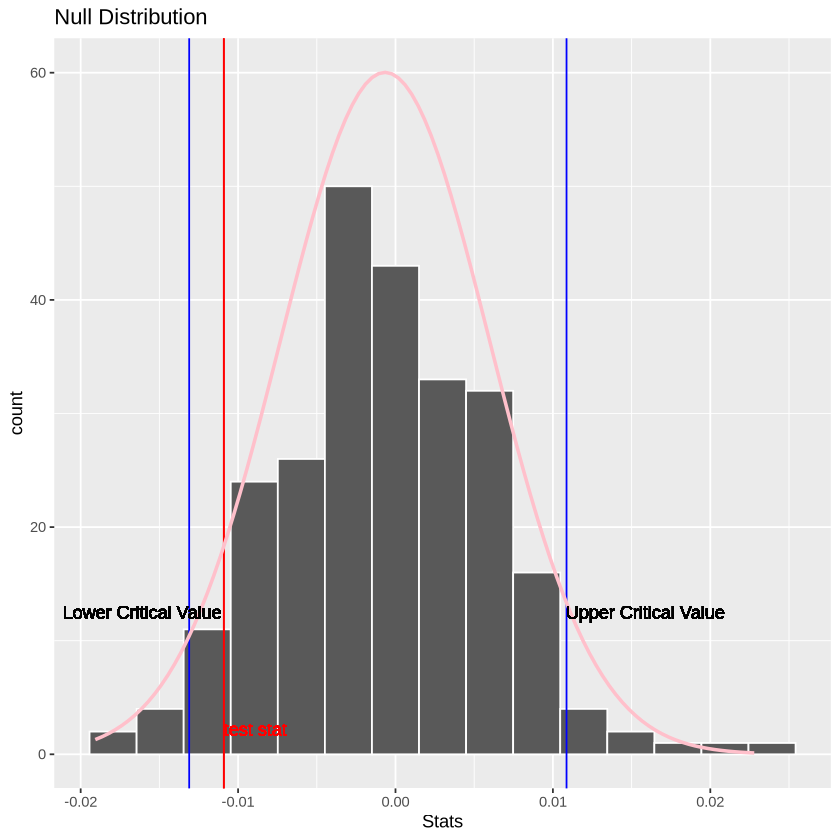

In [12]:
# Mean and sd of test statistics for normal curve
mu <- mean(null_model$stat)
sigma <- sd(null_model$stat)

# Critical values to check if test stat is in rejection region
CV <- null_model |> summarize(low = quantile(stat, 0.025),
                               up = quantile(stat, 0.975))

null_model_plot <- 
   null_model %>%
   visualize() + 
   geom_vline(xintercept = obs_mean_diff, color = "red") +
   geom_vline(xintercept = obs_mean_diff, color = "red") +
   geom_vline(xintercept = pull(CV[1]), color = "blue") +
   geom_vline(xintercept = pull(CV[2]), color = "blue") +
   xlab("Stats") +
   ggtitle("Null Distribution") +
   stat_function(fun = dnorm, args = list(mean = mu, sd = sigma), color = "pink", size = 1) +
   geom_text(aes(x = obs_mean_diff + 0.002, y = 0.5, label = "test stat"), vjust = -1, color = "red") +
   geom_text(aes(x = pull(CV[1]) - 0.003, y = 0.5, label = "Lower Critical Value"), vjust = -10, color = "black") +
   geom_text(aes(x = pull(CV[2]) + 0.005, y = 0.5, label = "Upper Critical Value"), vjust = -10, color = "black")

# your code here

null_model_plot

In [13]:
# P-value of the null model
p_value_null <- 
   null_model %>% 
   get_p_value(obs_stat = obs_mean_diff, direction = "both")

p_value_null

p_value
<dbl>
0.128


After the bootstrapping method, we tried to use the theory based asymptotic method as well, to compare any differences between the two.

In [17]:
USA <- working_dataset |>
    filter(clan_location == "United States")

Canada <- working_dataset |>
    filter(clan_location == "Canada")

result <- 
    tidy(
        t.test(x = USA$win_proportion,
               y = Canada$win_proportion,
               alternative = "t",
               mu = 0,
               conf.level = 0.95))

result
pull(result, p.value[1])

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
-0.01090508,0.6284181,0.6393232,-1.653927,0.09827961,2286.81,-0.02383484,0.002024683,Welch Two Sample t-test,two.sided


[1] 0.09827961


The p values and confidence intervals obtained from both methods are mostly similar, and the difference between the two can be attributed to a few reasons:
- The assumptions needed to use the asymptotic method
- The possibility that the sample is not representative of the population, despite its size

However in this particular case, we think the asymtotic method is more appropriate than boostrapping:
- The size of our sample is large enough to justify the use of the t-test based on the principles of the CLT.
- T-test is more computationally efficient as the kernel crashes when we try to take a large number of reps while bootstrapping which makes it difficult to use. 
- Upon examining the p-values, we can see that both tests lead to the same conclusion which is failing to reject the null hypothesis that win proportions for Canada and The US are equal.

## Discussion

Given that we failed to reject the null hypothesis, therefore the difference in means is more or less the same. 
This implies that the quality of players in these two countries is similar, which is what we expected to find before carrying out the test, due to the general similarities between these two regions. This outcome suggests that geographical proximity and cultural similarities contribute to comparable player performance. However, given that the gaming industry in the United States is so much larger, this also shows that quantity of clans does not translate to better quality clans. 

To make this study more accurate, we could have conducted a longitudinal study to track the war win proportions over time to identify development of trends and seasons where the players' performance is influenced; this would evidently be time-consuming and expensive.

The fact that there was no significant difference found between Canadian and American clans, leads us to question the esports performance of clans in other regions. Another thing we can analyse is whether the factors influencing clan war win proportions in Clash of Clans are consistent across various games or if there are game-specific dynamics. Other factors that may affect performance of an area could clan type, clan level etc.

Further research could extend the analysis to compare clans from different countries or continents to identify potential variations in player quality and if it is based on cultural factors not including geographical proximity. Due to the fact that any player can join any clan, the data set we used may not be completely representative geographically therefore we can carry out another study using a data set comparing specific player nationalities instead.
To take it a step further, we could also analyse performance across different games within the eSports industry to determine what region is the most skilled. 


### References

Dataset: https://www.kaggle.com/datasets/asaniczka/clash-of-clans-clans-dataset-2023-3-5m-clans

Parsahkov, P., Zavertiaeva, M. (2018). Determinants of Performance in eSports: A Country-Level Analysis. https://www.researchgate.net/profile/Petr-Parshakov/publication/324152297_Determinants_of_performance_in_eSports_A_country-level_Analysis/links/5ba90fcd92851ca9ed224fc1/Determinants-of-performance-in-eSports-A-country-level-Analysis.pdf

Kashcha M., Yatsenko V., Gyömörei, T. (2022). Country Performance in e-Sport: Social and Economic Development Determinants.
https://www.ceeol.com/search/article-detail?id=1108108
